In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
df=pd.read_csv('tips.csv')

In [6]:
df.sample(10)

,total_bill,tip,gender,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
120,11.69,2.31,Male,No,Thur,Lunch,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
24,19.82,3.18,Male,No,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
192,28.44,2.56,Male,Yes,Thur,Lunch,2
148,9.78,1.73,Male,No,Thur,Lunch,2


In [4]:
df.shape

(244, 7)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [7]:
#Summary statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#For categorical variables
df['day'].value_counts(normalize=True) # for percentage normalize=True

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='day'>

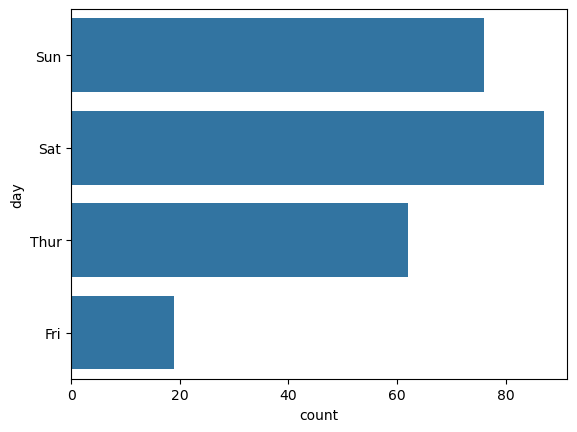

In [15]:
import seaborn as sns
sns.countplot(df['day'])

<Axes: ylabel='count'>

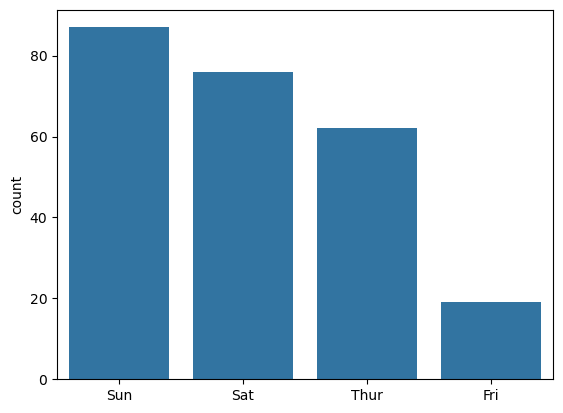

In [18]:
sns.barplot(x=df['day'].unique(),y=df['day'].value_counts())

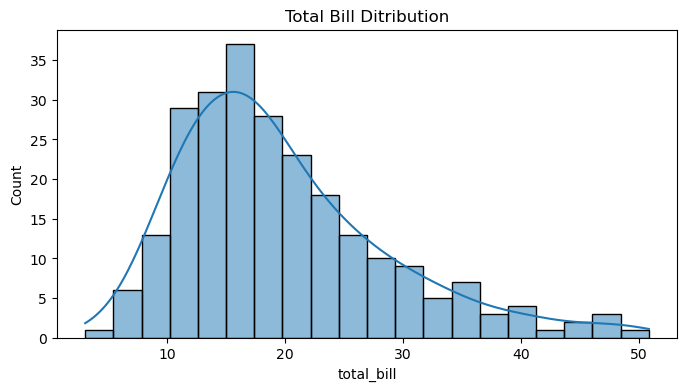

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df['total_bill'],kde=True,bins=20)
plt.title("Total Bill Ditribution")
plt.show()

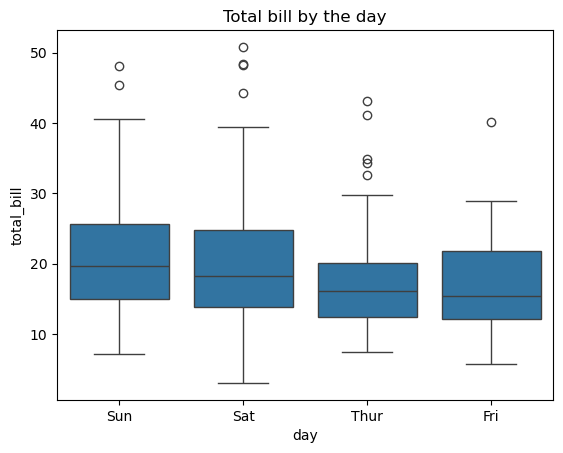

In [21]:
sns.boxplot(x='day',y='total_bill',data=df)
plt.title('Total bill by the day')
plt.show()

In [29]:
# sns.heatmap(['tip','total_bill'])
# plt.title('Relation between the two numerical data')
# plt.show()

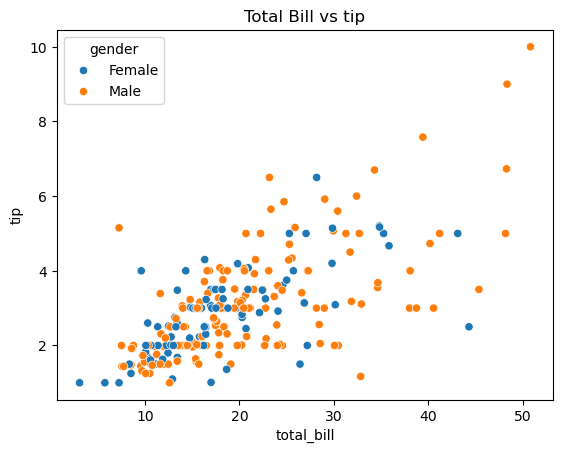

In [32]:
#Scatterplot
sns.scatterplot(x='total_bill',y='tip',hue='gender',data=df)
plt.title("Total Bill vs tip")
plt.show()

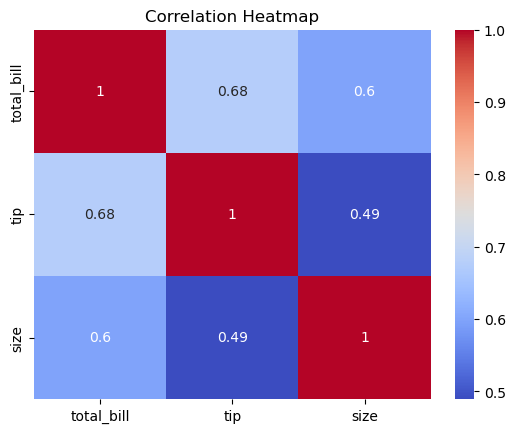

In [33]:
#correlation matrix
corr_mat=df.select_dtypes(include='number').corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

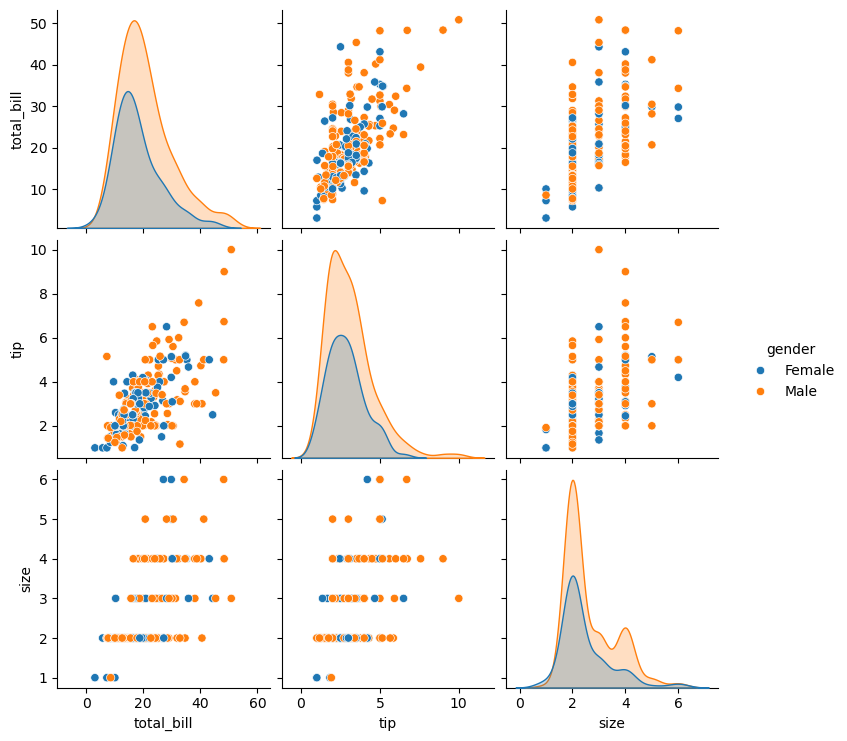

In [36]:
#Pairplot
sns.pairplot(df,hue='gender')

plt.show()

In [39]:
#Relationship between Gender and Smoking habit
from scipy.stats import chi2_contingency
contigenct_table=pd.crosstab(df['gender'],df['smoker'])
chi2,p,dof,expected=chi2_contingency(contigenct_table)
print(f'Chi2: {chi2}, p-value:{p},dof:{dof}')

Chi2: 0.0, p-value:1.0,dof:1
